# Matplotlib - 기본 그래프 도구
- 시각화 도구를 사용하면 다양한 종류의 데이터 분석 가능
 - 데이터에는 수천, 수만개를 넘기는 경우가 많음
- 그래프를 이용하면 데이터의 구조와 패턴을 파악하기가 용이
- 다양한 관점에서 데이터에 관한 통찰력 제공
- 판다스는 데이터 시각화를 지원하는 내장 기능이 존재하지만 풍부하진 않음
 - 다른 시각화 도구와 함께 사용하는 것을 추천

### Matplotlib 특징
- 2D 평면 그래프에 관한 다양한 포멧과 기능을 지원
- 그래프 요소를 세세하게 꾸미기 가능

### 선 그래프
- 선 그래프(line plot)는 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터 값 사이의 관례를 표현
- 시계열 데이터와 같이 연속적인 값의 변화와 패턴을 파악하는데 적합

In [27]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
2,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
3,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
4,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073


- '전출지별' 열에는 누락 데이터(NaN) 다수 존재
 - Excel 파일에서 병합된 셀을 데이터프레임으로 변환할 때 적절한 값을 찾지 못해 발생
 - method='ffill'옵션을 사용하여 누락 데이터가 있는 행의 바로 앞에 위치한 데이터 값으로 채움
 - 3행의 NaN 값을 2행의 데이터('전국')로 대체 가능

### 선 그래프 예제(서울->다른 지역)
 1. method = 'ffill'
 2. 서울에서 다른 지역으로 이동한 데이터만 추출 (A 열은 서울, B열은 서울X)
 3. 전출지별 열 제거
 4. 전입지별 -> 전입지
 5. 전입지를 행 인덱스로 지정

In [36]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

In [19]:
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


### 선 그래프 예제(서울 -> 경기)

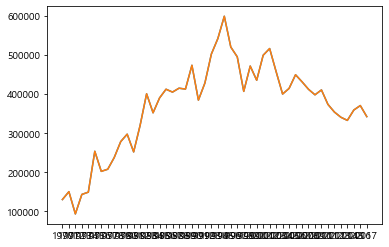

In [37]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
dt_g = df_seoul.loc['경기도']

# x, y축 데이터를 plot() 함수에 직접 입력
plt.plot(dt_g.index, dt_g.values)

# 판다스 객체를 plot() 함수에 입력
print(plt.plot(dt_g))

### 차트 제목, 축 이름 추가

- 그래프 객체에 차트 제목을 추가할 떄는 title() 함수 사용
- x축 이름은 xlabel() 함수 사용
- y축 이름은 ylabel() 함수 사용

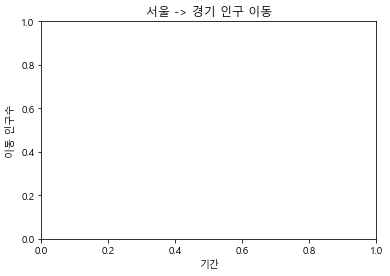

In [38]:
# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# 차트를 시각화
plt.show()

### Matplotlib 한글 폰트 문제 해결
- Matplotlib은 한글 폰트 지원 X
- 파이썬 프로그램의 앞부분에 한글 폰트를 지정하는 코드 추가

### 폰트 오류 해결 예제

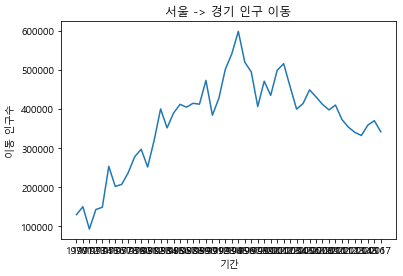

In [40]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt





# Matplotlib 한글 폰트 오류 문제 해결(함수 가져오기)
from matplotlib import font_manager, rc

# font_manager는 경로와 이름을 가지고 폰트를 지정
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

# rc는 폰트를 적용
rc('font', family=font_name)







# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
dt_g = df_seoul.loc['경기도']

# x, y축 데이터를 plot() 함수에 직접 입력
plt.plot(dt_g.index, dt_g.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# 차트를 시각화
plt.show()

### 그래프 꾸미기
`x축 눈금 라벨의 글씨가 서로 겹쳐 잘 보이지 않는 문제를 해결`
- 눈금 라벨이 들어갈 만한 충분한 여유 공간이 없기 때문에 발생하는 문제

`해결방법 2가지`
1. 공간을 만들기 위해 figure() 함수를 사용하여 그림들의 가로 사이즈를 더 크게 설정
2. xticks() 함수를 사용하여 x축 눈금 라벨을 반시계 방향으로 90도 회전하여 글씨가 겹치지 않게 하기

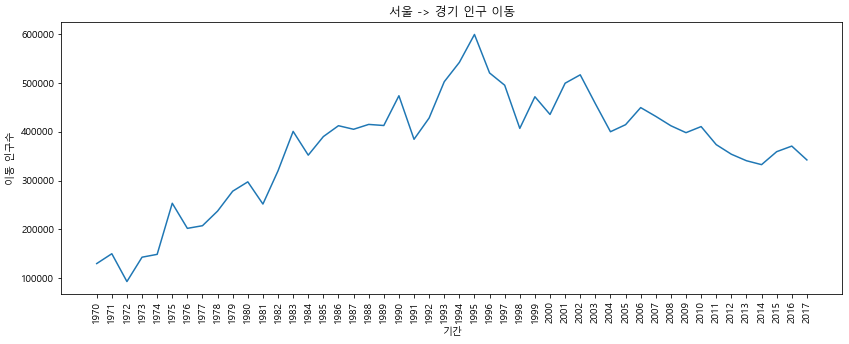

In [43]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 문제 해결(함수 가져오기)
from matplotlib import font_manager, rc

# font_manager는 경로와 이름을 가지고 폰트를 지정
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

# rc는 폰트를 적용
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
dt_g = df_seoul.loc['경기도']





# 그림 사이즈를 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전(rotation = 90)
plt.xticks(rotation='vertical')






# x, y축 데이터를 plot() 함수에 직접 입력
plt.plot(dt_g.index, dt_g.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# 차트를 시각화
plt.show()

- 글씨를 회전하기 위해서 사용한 rotation='vertical' 옵션에 'vertical' 대신 각도를 나타내는 숫자를 입력해도 됨
 - ex) rotation=90 -> 반시계 방향으로 90도 회전

### Matplotlib의 스타일 서식 지정
- 색, 스타일 등 디자인적 요소를 사전에 지정된 스타일로 빠르게 변경 가능
 - 스타일 서식을 지정하는 것은 Matplotlib 실행 환경 설정을 변경하는 것이므로 다른 파일을 실행할 때도 계속 적용되는 점 유의
 - 예제에서는 'ggplit'이라는 스타일 서식 지정
 - x축 눈금 라벨을 지정하는 xticks() 함수에 size=10 옵션을 추가하여 폰트 크기를 10으로 설정
 - plot() 함수에 marker='o' 옵션을 추가하면 원 모양의 점을 마커로 표시

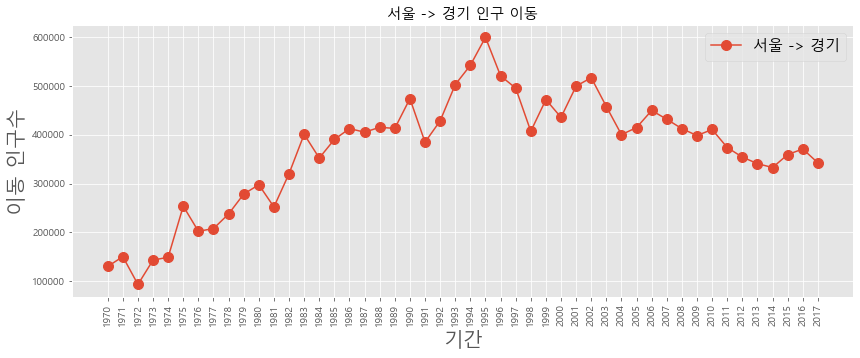

In [47]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 문제 해결(함수 가져오기)
from matplotlib import font_manager, rc

# font_manager는 경로와 이름을 가지고 폰트를 지정
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

# rc는 폰트를 적용
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
dt_g = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈를 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전(rotation = 90), 사이즈 변경
plt.xticks(rotation='vertical', fontsize=10)

# x, y축 데이터를 plot() 함수에 직접 입력, 마커표시 추가
plt.plot(dt_g.index, dt_g.values, marker = 'o', markersize=10)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가, 사이즈 변경
plt.xlabel('기간', size =20)
plt.ylabel('이동 인구수', size=20)

# 범례 추가 loc='best'는 우측 상단에 표시하겠다는 뜻
plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15)

# 차트를 시각화
plt.show()

### 예제(스타일 서식)

- 스타일 서식을 지정하는 것은 Matplotlib 실행 환경 설정을 변경하는 것이므로 다른 파일을 실행할 때도 계속 적용되는 점 유의

**Matplotlib 스타일 서식 종류**
- default, classic, bmh, dark_background, fast, grayscale, seaborn 등

<function matplotlib.pyplot.show(close=None, block=None)>

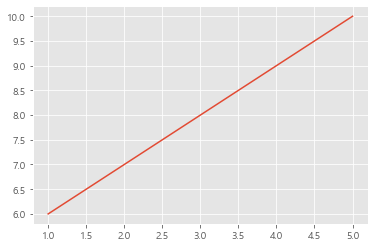

In [48]:
x = [1,2,3,4,5]
y = [6,7,8,9,10]

plt.plot(x, y)

plt.show

- 앞에 코드에서 스타일 서식을 지정할 경우 다음 코드에 전에 지정해놓은 스타일 서식 그대로 지정됨

### 설명을 덧붙이는 주석
- annotate() 함수를 사용
 - 주석 내용(텍스트)을 넣을 위치와 정렬 방법 등을 전달
- arrowprops 옵션을 사용하면 텍스트 대신 화살표 표현
 - 화살표 스타일, 시작점과 끝점의 좌표를 입력
 - dict : arrowprops에는 키가 지정되어 있음
- 예제에서는 주석을 넣을 여백 공간을 확보하기 위해서 ylim() 함수를 사용하여 y축의 범위 증가
- annotate() 함수를 사용하여 화살표와 텍스트의 위치를 잡아서 배치
 - 위치를 나타내는 (x,y) 좌표에서 x값은 인덱스 번호 사용
 - x 위치에 "(따옴표)로 묶어주어 값으로 표현 가능
 - y 값에는 인구수 데이터 숫자값을 사용
 - rotation 옵션 사용(양(+)의 회전 방향은 반시계 방향을 의미)

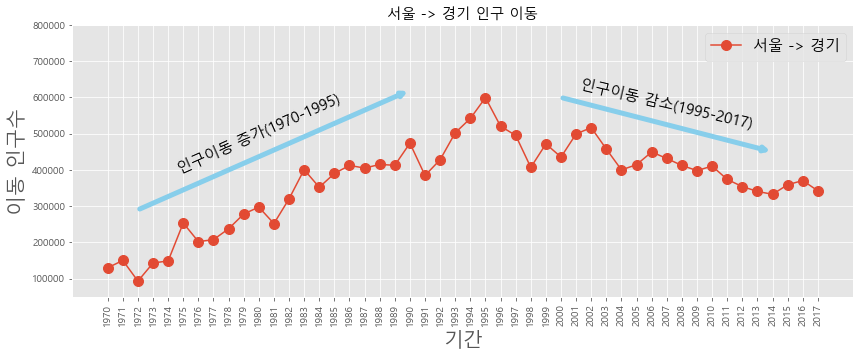

In [62]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 문제 해결(함수 가져오기)
from matplotlib import font_manager, rc

# font_manager는 경로와 이름을 가지고 폰트를 지정
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

# rc는 폰트를 적용
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
dt_g = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈를 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전(rotation = 90), 사이즈 변경
plt.xticks(rotation='vertical', fontsize=10)

# x, y축 데이터를 plot() 함수에 직접 입력, 마커표시 추가
plt.plot(dt_g.index, dt_g.values, marker = 'o', markersize=10)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가, 사이즈 변경
plt.xlabel('기간', size =20)
plt.ylabel('이동 인구수', size=20)

# 범례 추가 loc='best'는 우측 상단에 표시하겠다는 뜻
plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15)

# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),    # 화살표의 머리 부분(끝점)
             xytext=(2, 290000), # 화살표의 꼬리 부분(시잠점)
             xycoords='data',    # 좌표체계
             # 화살표 서식
             # dict : 화살표의 특성을 지정
             # lw : 화살표의 두께
             arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw=5))

plt.annotate('',
             xy=(44, 450000),    # 화살표의 머리 부분(끝점)
             xytext=(30, 600000), # 화살표의 꼬리 부분(시잠점)
             xycoords='data',    # 좌표체계
             # 화살표 서식
             # dict : 화살표의 특성을 지정
             # lw : 화살표의 두께
             arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw=5))

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',  # 텍스트 입력
             xy=(10,500000),              # 텍스트 위치 기준점(중간)
             rotation = 24,               # 텍스트 회전 각도
             va = 'center',               # 텍스트 상하 정렬('center', 'top','bot')
             ha = 'center',               # 텍스트 좌우 정렬('center', 'left', 'right')
             fontsize = 15)
             
plt.annotate('인구이동 감소(1995-2017)',  # 텍스트 입력 
             xy=(37, 580000),             # 텍스트 위치 기준점(중간)
             rotation=-13,                # 텍스트 회전 각도
             va='center',                 # 텍스트 상하 정렬('center', 'top', 'bottom')
             ha='center',                 # 텍스트 좌우 정렬('center', 'left', 'right'),
             fontsize=15
            )

# 차트를 시각화
plt.show()

### 화면을 분할하여 그래프 여러 개 그리기 - axe 객체 활용
화면을 여러 개로 분할하고 분할된 각 화면에 서로 다른 그래프를 그리는 방법
- 여러 개의 axe 객체를 생성, 분할된 화면마다 axe 객체를 하나씩 배정
 - axe 객체는 각각 서로 다른 그래프 표현 가능
 - 한 화면에서 여러 개의 그래프를 비교하거나 다양한 정보를 동시에 보여줄 때 사용
- figure() 함수를 사용하여 그래프를 그리는 그림틀 생성
 - figsize 옵션을 사용하여 (가로, 세로) 그림틀 크기 지정
 - fig 객체에 add_subplot() 함수를 적용하여 그림틀을 여러 개로 분할
- add_subplot() 함수 인자에 "행의 개수, 열의 개수, 서브플롯 순서"를 순서대로 입력
 - ex) ax1 = fig.add_subplot(2, 1, 1)
- 예제에서는 점으로만 구성된 그래프와 점, 선으로 구성된 그래프 두 개 생성

C:\Users\vjkim\AppData\Local\Temp/ipykernel_15184/3577622307.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dt_g.index, rotation=90)
C:\Users\vjkim\AppData\Local\Temp/ipykernel_15184/3577622307.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dt_g.index, rotation=90)


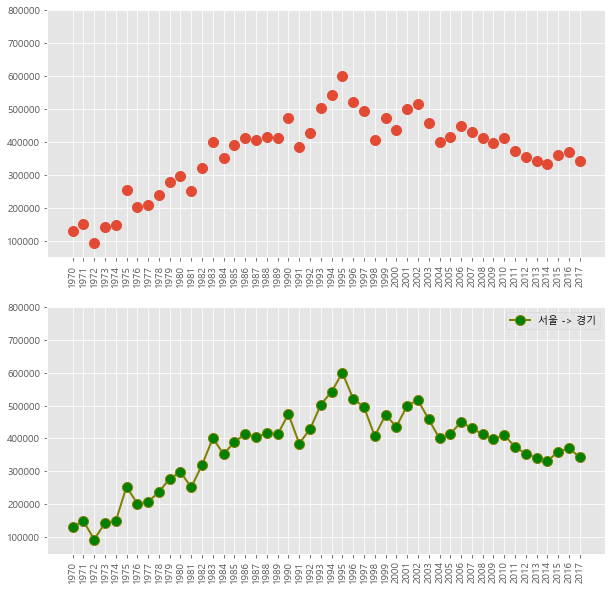

In [63]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 문제 해결(함수 가져오기)
from matplotlib import font_manager, rc

# font_manager는 경로와 이름을 가지고 폰트를 지정
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

# rc는 폰트를 적용
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
dt_g = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# axe 객체에 plot 함수로 그래프 출력
# marker : 마커의 모양('o', '+', '*', '.')
# markerfacecolor : 마커의 배경색
# markersize : 마커의 크기
# color : 선의 색
# linewidth : 선의 두께
# label : 범례 지정
ax1.plot(dt_g, 'o', markersize = 10)
ax2.plot(dt_g, marker='o', markerfacecolor='green', markersize = 10,
         color = 'olive', linewidth = 2, label = '서울 -> 경기')
ax2.legend(loc='best')

# y축 범위 지정
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨을 회전
ax1.set_xticklabels(dt_g.index, rotation=90)
ax2.set_xticklabels(dt_g.index, rotation=90)

plt.show()

### 앞에서 그린 두 번째 그래프에 제목과 축 이름 추가
- ax 객체에 set_title() 함수를 적용하여 제목 추가
- set_xlabel() 함수로 x축 이름 지정
- set_ylabel() 함수로 y축 이름 지정
- tick_params() 함수로 축 눈금 라벨의 크기

C:\Users\vjkim\AppData\Local\Temp/ipykernel_15184/3761207002.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dt_g.index, rotation=90)


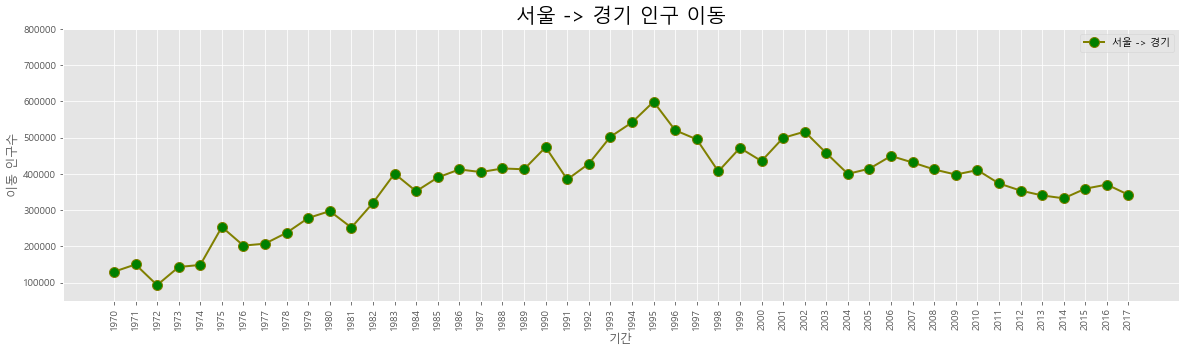

In [65]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
dt_g = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
# marker : 마커의 모양('o', '+', '*', '.')
# markerfacecolor : 마커의 배경색
# markersize : 마커의 크기
# color : 선의 색
# linewidth : 선의 두깨
# label : 범례 지정
ax.plot(dt_g, marker='o', markerfacecolor='green', markersize=10,
         color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

# y축 범위 지정
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size = 20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨을 회전
ax.set_xticklabels(dt_g.index, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()

### 동일한 그림에 여러 개의 그래프를 추가
- 서울특별시에서 충청북도, 전라남도, 경상북도로 이동한 인구 변화 그래프 3개를 하나의 화면에 출력
- 각 지역에 해당하는 행을 선택, 선 그래프를 출력하는 plot() 메소드를 3번 적용

C:\Users\vjkim\AppData\Local\Temp/ipykernel_15184/3142585403.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


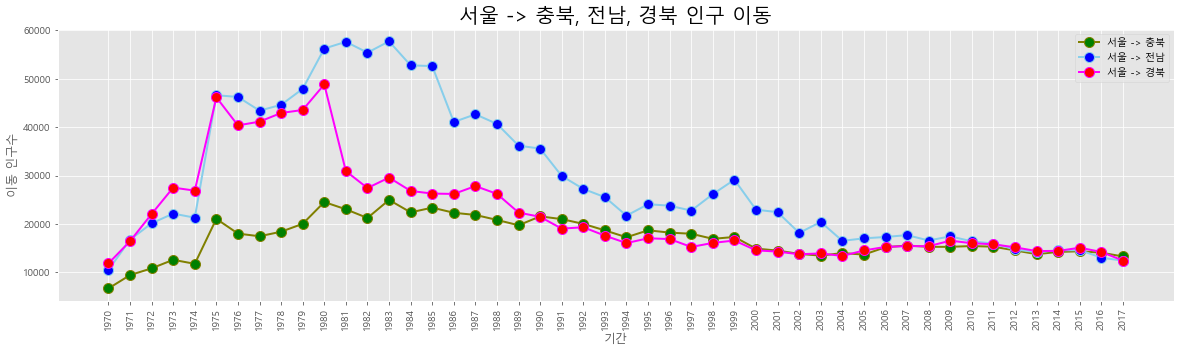

In [66]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(1970,2018)))
df_3 = df_seoul.loc[['충청북도', '전라남도', '경상북도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot() 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청북도',:], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충북')
ax.plot(col_years, df_3.loc['전라남도', :], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 전남')
ax.plot(col_years, df_3.loc['경상북도', :], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 경북')
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충북, 전남, 경북 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨을 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()

### 화면 4분할 그래프 예제

C:\Users\vjkim\AppData\Local\Temp/ipykernel_15184/3314551671.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
C:\Users\vjkim\AppData\Local\Temp/ipykernel_15184/3314551671.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
C:\Users\vjkim\AppData\Local\Temp/ipykernel_15184/3314551671.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
C:\Users\vjkim\AppData\Local\Temp/ipykernel_15184/3314551671.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


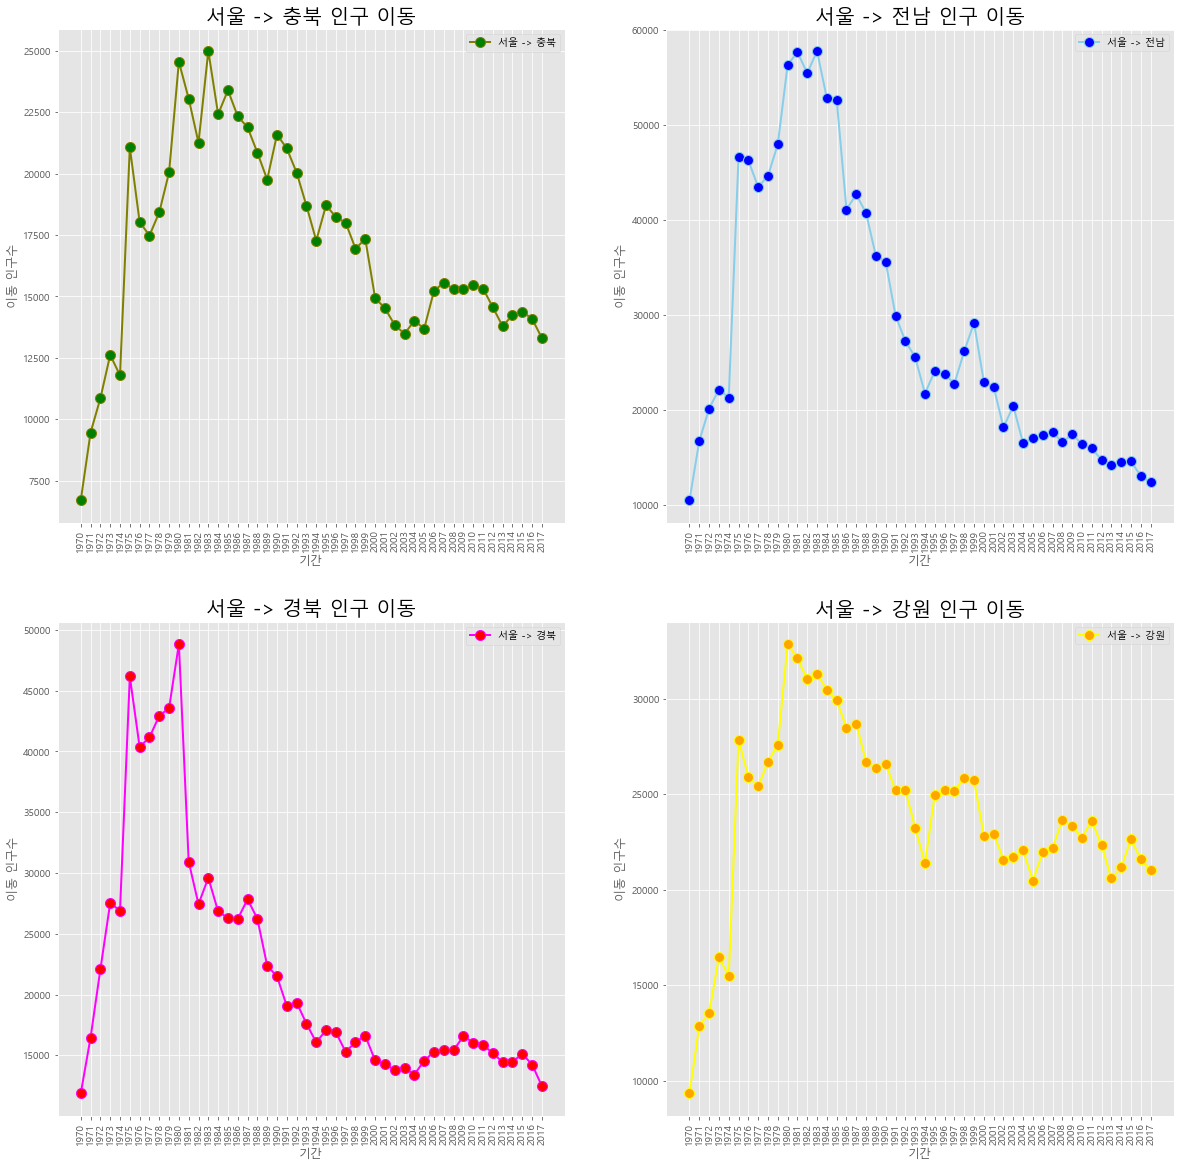

In [69]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에 plot() 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청북도', :], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충북')
ax2.plot(col_years, df_4.loc['전라남도', :], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 전남')
ax3.plot(col_years, df_4.loc['경상북도', :], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 경북')
ax4.plot(col_years, df_4.loc['강원도', :], marker='o', markerfacecolor='orange',
        markersize=10, color='yellow', linewidth=2, label='서울 -> 강원')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')


# 차트 제목 추가
ax1.set_title('서울 -> 충북 인구 이동', size=20)
ax2.set_title('서울 -> 전남 인구 이동', size=20)
ax3.set_title('서울 -> 경북 인구 이동', size=20)
ax4.set_title('서울 -> 강원 인구 이동', size=20)

# 축 이름 추가
ax1.set_xlabel('기간', size=12)
ax1.set_ylabel('이동 인구수', size=12)
ax2.set_xlabel('기간', size=12)
ax2.set_ylabel('이동 인구수', size=12)
ax3.set_xlabel('기간', size=12)
ax3.set_ylabel('이동 인구수', size=12)
ax4.set_xlabel('기간', size=12)
ax4.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨을 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax1.tick_params(axis="x", labelsize=10)
ax1.tick_params(axis="y", labelsize=10)
ax2.tick_params(axis="x", labelsize=10)
ax2.tick_params(axis="y", labelsize=10)
ax3.tick_params(axis="x", labelsize=10)
ax3.tick_params(axis="y", labelsize=10)
ax4.tick_params(axis="x", labelsize=10)
ax4.tick_params(axis="y", labelsize=10)

# 간격 자동 조정
# fig.tight_layout()

plt.show()

### 그래프 간격을 넓히고 싶은 경우
- 자동 조정
 - tight_layout() 함수
 - ex) fig.tight_layout()
- 직접 조정
 - subplots_adjust()
 - ex) plt.subplots_adjust()
 - left, right, top, bottom, wspace(서브 플롯 사이의 좌우 예비 공간), hspace(서브 플롯 사이의 상하 예비 공간)

### Matplotlib에서 사용할 수 있는 색상 확인

In [70]:
import matplotlib

# 컬러 정보를 받아올 변수
colors = {}

for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex
    
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

### 면적 그래프
면적 그래프(area plot)는 각 열의 데이터를 선 그래프로 구현, 선 그래프와 x축 사이의 공간에 색 적용
- 색의 투명도(alpha)를 지정(기본값:0.5, 범위:0~1)
- plot() 함수에 kind='area' 옵션을 추가
- 그래프를 누적할지의 여부 설정 가능(기본값 옵션: stacked=True)
 - 각 열의 선 그래프를 다른 열의 선 그래프 위로 쌓아올리는 방식
 - 각 열의 패턴과 열 전체의 합계가 어떻게 변하는지 확인 가능
 - stacked=False 옵션 사용 시 각 그래프들이 누적되지 않고 서로 겹치게 표시됨

### 면적 그래프(stacked=True) 그리기 예제

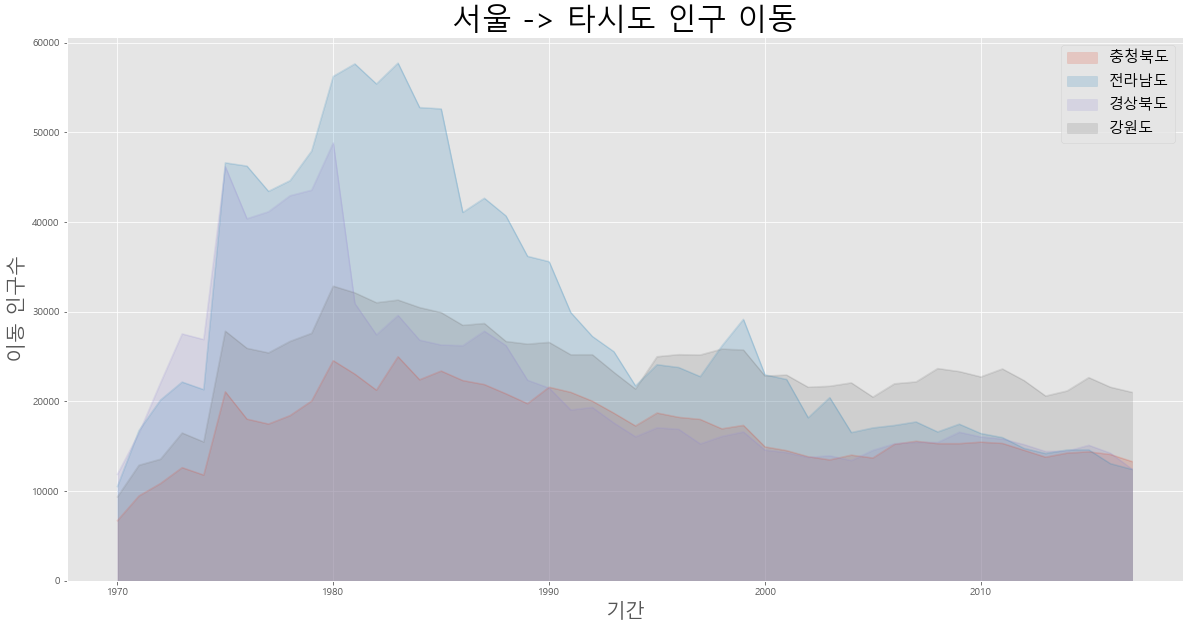

In [75]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]
df_4 = df_4.T

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임 인덱스를 정수형 변경
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

### 면적 그래프(stacked=False) 그리기 예제

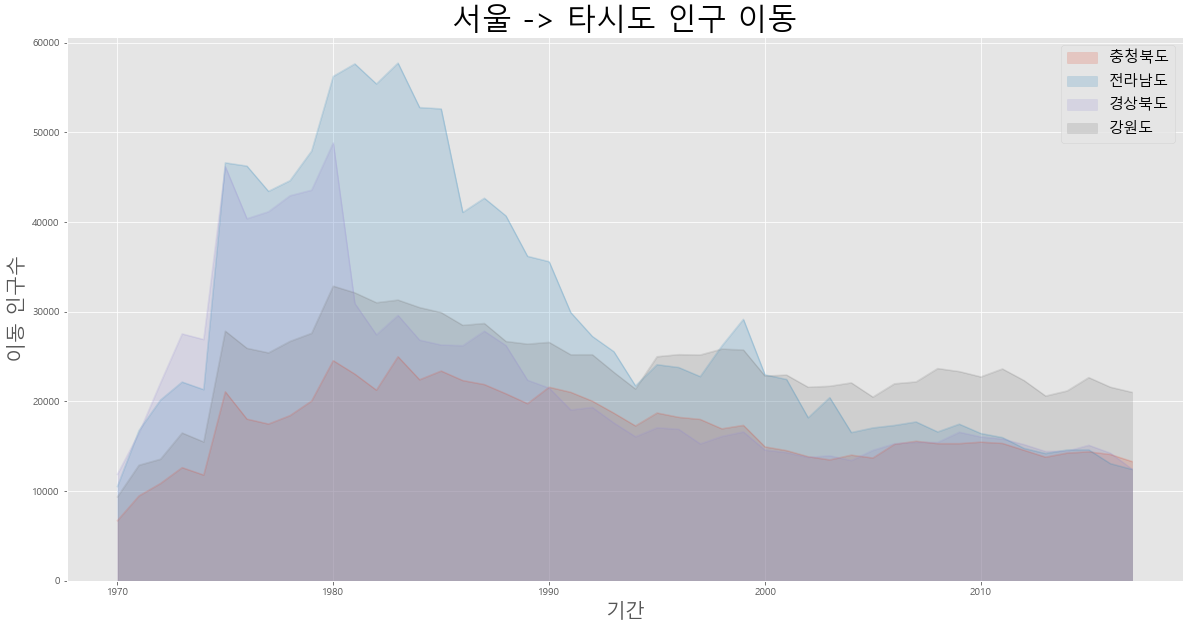

In [77]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]
df_4 = df_4.T

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임 인덱스를 정수형 변경
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

### axe 객체(ax)의 세부적인 요소 설정 가능
- axe 객체의 속성을 이용하여 제목, 축 이름 설정 가능